<a href="https://colab.research.google.com/github/Doppler-67/bootstrap-petroleum-boreholes-analysis/blob/main/bootstrap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Данные:**

Имеются пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

**Цель проекта:**

Нужно проанализировать возможную прибыль и риски и решить в каком регионе лучше всего вести добычу нефти. 

⭕ *Более подробная информация находится в README файле.*  

# **Importing libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
sns.set()

#**Data understanding**

In [3]:
first_region = pd.read_csv('/content/drive/MyDrive/bootstrap_analysis_ds_project/geo_data_0.csv')
second_region = pd.read_csv('/content/drive/MyDrive/bootstrap_analysis_ds_project/geo_data_1.csv')
third_region = pd.read_csv('/content/drive/MyDrive/bootstrap_analysis_ds_project/geo_data_2.csv')

Изучим данные.

In [4]:
regions = [first_region, second_region, third_region]

In [5]:
for index, region in enumerate(regions):
    print(f'\n{str(index+1)} region:')
    display(region.head())
    print('\n')
    region.info()
    print('-'*55)


1 region:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
-------------------------------------------------------

2 region:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
-------------------------------------------------------

3 region:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
-------------------------------------------------------


In [6]:
for region in regions:
  print(region.isnull().values.any())

False
False
False


Пропусков нет.

In [7]:
for region in regions:
  print(region.duplicated().values.any())

False
False
False


Дубликатов тоже нет.

# **EDA**

Text(0.5, 1.0, '1 region profit distribution')

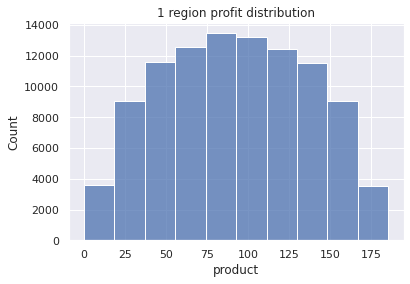

In [8]:
sns.histplot(first_region, x='product', bins=10)
plt.title('1 region profit distribution')

Text(0.5, 1.0, '2 region profit distribution')

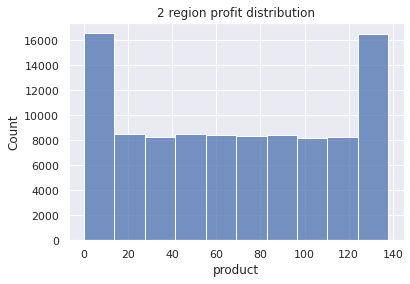

In [9]:
sns.histplot(second_region, x='product', bins=10)
plt.title('2 region profit distribution')

Text(0.5, 1.0, '3 region profit distribution')

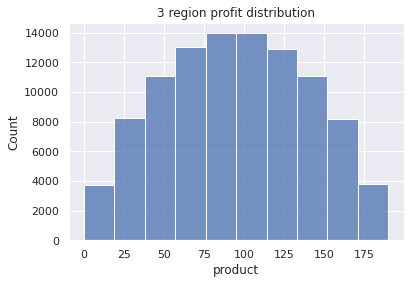

In [10]:
sns.histplot(third_region, x='product', bins=10)
plt.title('3 region profit distribution')

У первого и третьего региона объем запасов в скважинах распределен нормально, в отличии от второго региона.

Теперь посмотрим на корреляции.

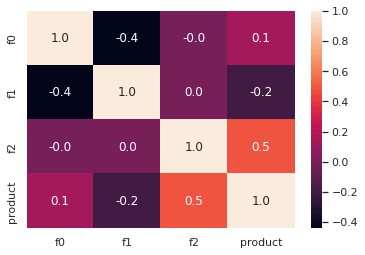

In [11]:
sns.heatmap(first_region.corr(), annot=True, fmt=".1f")

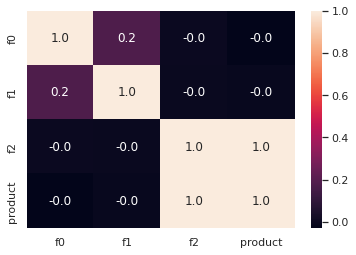

In [12]:
sns.heatmap(second_region.corr(), annot=True, fmt=".1f")

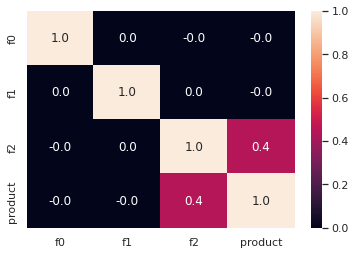

In [13]:
sns.heatmap(third_region.corr(), annot=True, fmt=".1f")

Как мы видим, у второго регоина 100% корреляция между фичей f2 и таргетом. 

# **Modeling**

Обучим модели для трех регионов.

In [14]:
regions_data = [] # дальше нам понадобятся некоторые данные, поэтому сохраним их в этом списке
for index, region in enumerate(regions):
    
    x = region.drop(['id','product'], axis=1)
    y = region['product']
    
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.8, random_state=67)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    predicted_values = model.predict(x_valid)
    
    print(f'{str(index+1)} region: \n')
    print('mean:', predicted_values.mean())
    print('RMSE:', mean_squared_error(y_valid, predicted_values)  ** 0.5, '\n')
    print('-'*30)
    regions_data.append([x_valid, model, y_valid]) # добавляем нужные данные в виде списка

1 region: 

mean: 92.55601015224029
RMSE: 37.70021264160988 

------------------------------
2 region: 

mean: 68.89268640812546
RMSE: 0.8899676737146945 

------------------------------
3 region: 

mean: 95.06208573847572
RMSE: 40.03392272541563 

------------------------------


Как мы видим, лучшее среднее у третьего региона, а минимальный RMSE у второго региона.

Возьмем случайные 500 точек из каждого региона, выберем из них 200 лучших и посчитаем общий обьем сырья с этих 200 точек.

Для удобства данные соеденены в датафрейм. Для каждого региона - он свой.

In [15]:
SAMPLE_SIZE = 500

In [16]:
region_subsamples = []
for index, region in enumerate(regions_data):
    
    region_subsample = region[0].sample(frac = SAMPLE_SIZE / len(region[0]), replace=True, random_state=67)
    predicted_subsample = region[1].predict(region_subsample)
    
    real_product = region[-1][region_subsample.index]
    predicted_series = pd.Series(predicted_subsample, name ='pred_product', index=region_subsample.index)
    region_subsample  = pd.concat([region_subsample, real_product, predicted_series], axis=1)
    print(f'\n{str(index+1)} region:')
    display(region_subsample)
    print('-'*64)
    
    region_subsamples.append(region_subsample)


1 region:


,f0,f1,f2,product,pred_product
67192,1.019115,-0.507577,5.025596,169.442408,121.432217
61959,-0.656248,0.585480,-0.153285,60.358633,66.265265
84089,0.546188,0.803550,5.204828,12.351684,102.763536
68779,0.857060,0.600099,1.615587,73.682868,83.246127
72541,-0.701994,0.465685,2.474675,128.804951,84.937476
...,...,...,...,...,...
65980,0.233341,0.944546,1.402949,27.609759,74.790401
80807,0.848047,0.588852,6.505423,121.951635,115.351922
47131,0.773142,0.581739,3.722922,154.443702,96.972102
3416,1.805397,-0.133326,1.780688,62.165186,97.960806


----------------------------------------------------------------

2 region:


,f0,f1,f2,product,pred_product
67192,9.826905,0.980642,5.002194,134.766305,135.030156
61959,7.657850,-1.765334,5.005259,134.766305,135.487163
84089,-7.605172,1.399072,2.994402,84.038886,83.423921
68779,-7.342660,-10.131412,1.991030,57.085625,56.595509
72541,12.439597,-10.059009,4.998765,134.766305,134.803636
...,...,...,...,...,...
65980,2.078634,-3.558967,4.999812,137.945408,136.187004
80807,4.202479,-6.332872,1.002036,26.953261,28.184019
47131,-7.854804,-10.127951,5.004333,137.945408,137.890839
3416,15.166146,-6.735876,0.003823,0.000000,-0.299056


----------------------------------------------------------------

3 region:


,f0,f1,f2,product,pred_product
67192,-0.592034,1.686970,1.484248,78.722634,88.837122
61959,2.641177,-3.862177,2.289370,93.374669,94.731314
84089,1.297035,-1.805486,1.594002,64.031664,90.261826
68779,0.266384,0.359870,5.242708,128.214318,110.735519
72541,1.958114,-2.739542,1.926531,149.046862,92.389253
...,...,...,...,...,...
65980,-3.190098,2.269103,1.614601,67.176119,89.385609
80807,1.356563,0.387340,-1.376216,54.086098,72.736331
47131,-3.745590,-1.667077,0.404013,108.810803,83.245845
3416,-0.115081,-0.988584,6.059425,91.792197,115.701109


----------------------------------------------------------------


# **Preparation for profit calculation**

In [17]:
# constants
PROFIT = 450000
BUDGET = 10 ** 10
BEST_POINTS = 200
BOOTSTRAP = 1000

Посчитаем сколько в среднем должно быть запасов в одной точке, для безубыточной разработки

In [18]:
min_barrels = BUDGET / PROFIT / BEST_POINTS
min_barrels

111.11111111111111

Точка безубыточности найдена. Если сравнить с расчетами ранее — ни один регион не дотягивает.

<b>Для того, чтобы разработка была безубыточна, нужно, чтобы в среднем в каждой точке было не меньше 111.1 тысяч бареллей сырья.</b>

# **Calculation of profit and risks**

Расчитаем среднее кол-во тысяч баррелей сырья в одной (лучшей) точке в каждом из трех регионов.

In [19]:
for index, region in enumerate(region_subsamples):
    top_200 = region.sort_values('pred_product', ascending=False)[:BEST_POINTS]
    mean_product = top_200['product'].mean()
    print(f'{str(index+1)} region:',mean_product)

1 region: 116.09644111625481
2 region: 119.27301782936397
3 region: 115.4853191066106


Как мы видим, значения больше 111.1, значит разработка в любом регионе окупится (при условии, что именно эти точки будут выбраны).

Напишем функцию, которая посчитает прибыль с региона, на вход она принимает суммарное кол-во тысяч баррелей с региона и цену одной тысячи баррелей.

In [20]:
def profit_counter(product, price):
    return product*price

In [21]:
for index, region in enumerate(region_subsamples):
    sum_product = region.sort_values('pred_product', ascending=False)[:BEST_POINTS]['product'].sum()
    print(f'{str(index+1)} region profit:', profit_counter(sum_product, PROFIT) - BUDGET)

1 region profit: 448679700.4629326
2 region profit: 734571604.6427288
3 region profit: 393678719.59495544


Самая большая чистая прибыль получилась во втором регионе.

# **Bootstrap**

Теперь сделаем все тоже самое, только не один раз, а тысячу. И посмотрим на распределение прибыли для каждого региона.

Создадим списки, в которых будем добавлять прибыль с каждой итерацией.

In [22]:
for i in range(len(regions_data)):
    regions_data[i].append([]) # добавляем к каждому региону список, в котором будут храниться все прибыли

In [23]:
state = np.random.RandomState(12345)

for i in range(BOOTSTRAP):
    for region in regions_data:
        
        region_subsample = region[0].sample(frac = SAMPLE_SIZE / len(region[0]), replace=True, random_state=state) # берем случайне
        predicted_subsample = region[1].predict(region_subsample) # делаем прогноз по их фичам                       500 точек
        
        real_product = region[2][region_subsample.index] # сохраним реальное значение product этих точек
        predicted_series = pd.Series(predicted_subsample, name='pred_product', index=region_subsample.index) 
        region_subsample  = pd.concat([region_subsample, real_product, predicted_series],axis =1) # соеденим все это в df 
        
        top_200 = region_subsample.sort_values('pred_product', ascending=False)[:BEST_POINTS] # возьмем 200 лучших точек
        sum_product = top_200['product'].sum() # посчитаем сум. обьем по реальным значениям
        
        region[-1].append(profit_counter(sum_product, PROFIT) - BUDGET) # добавим в список прибыь


In [24]:
region_profits = [] # тут будут все прибыли со всех регионов после бутстрепа
for i in range(len(regions_data)):
    regions_data[i][-1] = pd.Series(regions_data[i][-1])
    region_profits.append(regions_data[i][-1])

И тут же расчитаем риск убытков, для этого поделим кол-во прибылей, которые меньше 10млрд на общее кол-во прибылей в регионе.

95 % доверительный интервал: [-99521822.07296467, 934598929.1092478]
Mean: 417922387.717704
Риск убытков: 4.6%


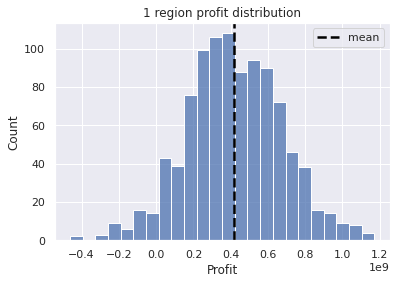

------------------------------------------------------------------- 

95 % доверительный интервал: [48942843.83350754, 852521148.2445186]
Mean: 450387906.5620281
Риск убытков: 1.6%


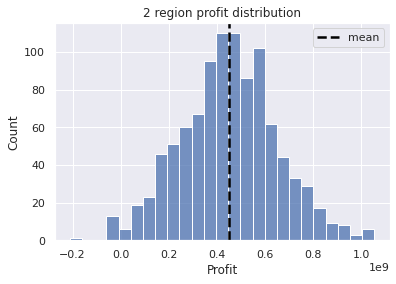

------------------------------------------------------------------- 

95 % доверительный интервал: [-120059599.18631457, 886053186.9137956]
Mean: 368649402.03789675
Риск убытков: 6.8%


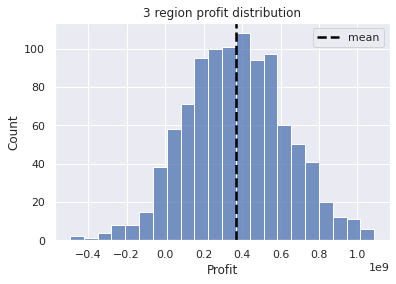

------------------------------------------------------------------- 



In [25]:
for index, region in enumerate(region_profits):
    sns.histplot(region)
    plt.axvline(region.mean(), ls ='--', lw=2.5, color='black', label = 'mean')
    plt.xlabel('Profit')
    plt.title(str(index+1) + ' region profit distribution')
    lower = region.quantile(0.025)
    upper = region.quantile(0.975)
    print(f'95 % доверительный интервал: [{lower}, {upper}]')
    print('Mean:', region.mean())
    print(f'Риск убытков: {len(region[region < 0]) / len(region):.1%}')
    plt.legend()
    plt.show()
    print('-'*67,'\n')

У всех регионов чистая прибыль распределена нормально. Только у второго региона 95% доверительный интервал не имеет отрицательных значений, то есть потенциальных убытков, а также у второго региона самый маленький риск, по сравнению с другими регионами.

# **Сonclusion**

<b> Лучшим регионом для добычи нефти будет второй, так как там самый минимальный риск, максимальное среднее и полностью прибыльный 95% доверительный интервал, в отличии от других регионов.   </b>